In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
# 한글 폰트 적용
from matplotlib import rc
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 확인
fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 폰트 설정, 확인
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']

font_location = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [2]:
welfare_raw = pd.read_csv('welfare.csv')
welfare = welfare_raw.copy()
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대
...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대


In [3]:
welfare = welfare.drop(['Unnamed: 0'], axis=1)

In [4]:
# < 5. 나이별 성별 월급 차이 >
# 1. 변수 검토 및 전처리(나이, 성별)
# 1번 프로젝트에서 검토함.

In [5]:
# 2. 분석표(통계요약)
age_gender_income = welfare.dropna(subset=['나이', '월급']) \
                            .groupby(['나이', '성별'], as_index=False) \
                            .agg(평균월급=('월급', 'mean'))
age_gender_income

,나이,성별,평균월급
0,19.0,여성,171.666667
1,20.0,남성,139.727273
2,20.0,여성,121.285714
3,21.0,남성,166.857143
4,21.0,여성,141.266667
...,...,...,...
141,90.0,남성,27.000000
142,90.0,여성,27.000000
143,91.0,남성,27.000000
144,91.0,여성,27.000000


<Axes: xlabel='나이', ylabel='평균월급'>

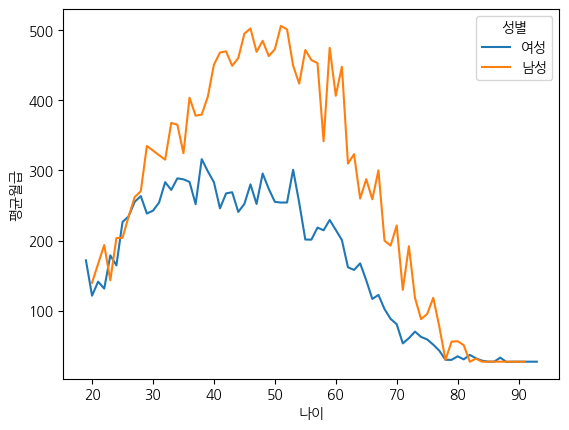

In [6]:
# 3. 시각화 - lineplot
sns.lineplot(data=age_gender_income, x='나이', y='평균월급', hue='성별')

In [10]:
# 4. 분석 결과
# 남성의 평균 월급은 20대: 약 150만원 ~ 50대: 약 500만원까지 지속적으로 증가
# 이후에 급격히 감소하게 된다
# 여성의 평균 월급은 20대: 약 170만원 ~ 30대: 약 280~300만원까지 지속적으로 증가
# 50대에 중반까지 비슷하게 유지. 이후에 급격하게 감소한다.

In [8]:
welfare.to_csv('welfare.csv')

In [9]:
welfare = pd.read_csv('welfare.csv')
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대
...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대
